In [1]:
VERSION

v"0.6.0"

In [2]:
using PyPlot
const plt = PyPlot

PyPlot

In [3]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "")
# @pyimport dataset.mnist as mnist

PyObject ['', '/opt/conda/lib/python36.zip', '/opt/conda/lib/python3.6', '/opt/conda/lib/python3.6/lib-dynload', '/opt/conda/lib/python3.6/site-packages', '/opt/conda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg']

In [4]:
include("load_mnist.jl")

LoadMnist

In [5]:
(x_train, t_train), (x_test, t_test) = LoadMnist.load_mnist()

((Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x05, 0x00, 0x04, 0x01, 0x09, 0x02, 0x01, 0x03, 0x01, 0x04  …  0x09, 0x02, 0x09, 0x05, 0x01, 0x08, 0x03, 0x05, 0x06, 0x08]), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x07, 0x02, 0x01, 0x00, 0x04, 0x01, 0x04, 0x09, 0x05, 0x09  …  0x07, 0x08, 0x09, 0x00, 0x01, 0x02, 0x03, 0x04, 0x05, 0x06]))

In [6]:
size(x_train)

(784, 60000)

In [7]:
size(t_train)

(60000,)

In [8]:
size(x_test)

(784, 10000)

In [9]:
size(t_test)

(10000,)

In [10]:
img = x_train[:, 1]
label = t_train[1]
Int(label)

5

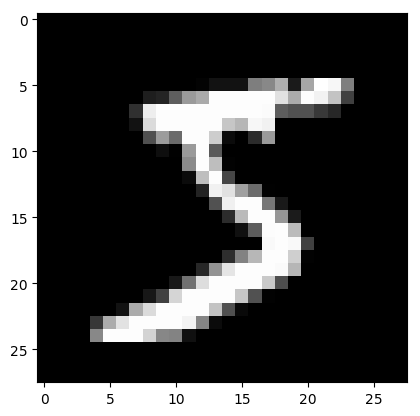

PyObject <matplotlib.image.AxesImage object at 0x7f11d166fe48>

In [11]:
plt.imshow(reshape(img, (28, 28)).', cmap="gray")

In [12]:
function get_data()
    (x_train, t_train), (x_test, t_test) = LoadMnist.load_mnist(;
            normalize=true, flatten=true, one_hot_label=false)
    return x_test, t_test
end

get_data (generic function with 1 method)

In [13]:
# using PyCall
# unshift!(PyVector(pyimport("sys")["path"]), "")
@pyimport load_pkl

In [14]:
function init_network()
    _network = load_pkl.load_pkl("sample_weight.pkl")
    return Dict(
        :W1 => _network["W1"].',
        :b1 => _network["b1"],
        :W2 => _network["W2"].',
        :b2 => _network["b2"],
        :W3 => _network["W3"].',
        :b3 => _network["b3"]
    )
end

init_network (generic function with 1 method)

In [15]:
sigmoid(x) = 1. / (1. + exp(-x))

sigmoid (generic function with 1 method)

In [16]:
function softmax(a)
    c = maximum(a)
    exp_a = exp.(a .- c)
    sum_exp_a = sum(exp_a)
    y = exp_a ./ sum_exp_a
    
    return y
end

softmax (generic function with 1 method)

In [17]:
function predict(network, x)
    W1, W2, W3 = network[:W1], network[:W2], network[:W3]
    b1, b2, b3 = network[:b1], network[:b2], network[:b3]
    
    a1 = W1 * x .+ b1
    z1 = sigmoid.(a1)
    a2 = W2 * z1 .+ b2
    z2 = sigmoid.(a2)
    a3 = W3 * z2 .+ b3
    y = softmax(a3)
    
    return y
end

predict (generic function with 1 method)

In [18]:
x, t = get_data()

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x07, 0x02, 0x01, 0x00, 0x04, 0x01, 0x04, 0x09, 0x05, 0x09  …  0x07, 0x08, 0x09, 0x00, 0x01, 0x02, 0x03, 0x04, 0x05, 0x06])

In [19]:
network = init_network()

Dict{Symbol,Any} with 6 entries:
  :W3 => Float32[-0.421736 -0.524321 … -0.544508 1.07228; 0.689445 -0.143625 … …
  :W1 => Float32[-0.00741249 -0.0102975 … -0.00761533 0.000279154; -0.00790439 …
  :b2 => Float32[-0.0147111, -0.0721513, -0.00155692, 0.121997, 0.116033, -0.00…
  :b1 => Float32[-0.0675032, 0.0695926, -0.0273047, 0.0225609, -0.220015, -0.22…
  :b3 => Float32[-0.0602398, 0.00932628, -0.0135995, 0.0216713, 0.0107372, 0.06…
  :W2 => Float32[-0.10694 0.299116 … 0.100016 -0.0222066; 0.0159125 -0.0332223 …

In [20]:
accuracy_cnt = 0
l = size(x, 2)
for i = 1:l
    y = predict(network, x[:, i])
    p = indmax(y) - 1
    if p == t[i]
        accuracy_cnt += 1
    end
end

accuracy_cnt / l

0.9352

## バッチ処理

In [21]:
function softmax(A::AbstractMatrix)
    mapslices(softmax, A, 1)
end

softmax (generic function with 2 methods)

In [22]:
y = predict(network, x)

10×10000 Array{Float64,2}:
 8.44125e-5   0.00483633  1.03583e-7   …  0.000624385  0.000428828
 2.63507e-6   0.00110459  0.988973        0.000767557  2.0043e-6  
 0.000715494  0.944252    0.00428949      0.000124992  0.00254057 
 0.00125863   0.0143091   0.00178321      0.000642085  2.01689e-6 
 1.1728e-6    5.69896e-7  0.000131734     0.00126703   0.000559177
 4.49908e-5   0.00667604  0.000759407  …  0.907499     0.00031262 
 1.62693e-8   0.0275334   0.00046891      0.00274028   0.996148   
 0.997065     1.27084e-6  0.00226997      3.81287e-5   4.34994e-7 
 9.37448e-6   0.00128642  0.00123787      0.0862065    6.37568e-6 
 0.000818312  4.78647e-8  8.67147e-5      8.9935e-5    3.77514e-7 

In [23]:
p = vec(mapslices(indmax, y, 1)) .- 1

10000-element Array{Int64,1}:
 7
 2
 1
 0
 4
 1
 4
 9
 6
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [24]:
mean(p .== t) # Accuracy

0.9352